## Generally use numerical methods like finite difference, fourier methods and monte carlo for valuation of derivative (Black scholes), but it has lot of assumptions like GBM for stock price, and constraints like no arbitrage. basically every numerical pricing techniques have some impractical model assumptions. 

## Second issue is model calibration which is not done on some historical data but by means of derivative prices of heaviliy traded options to the derivative price from the same mathematical model like builidng a vol surface, thoudsand of derivative prices are determined to fit the parameters of the models which is time consuming process.

## ML can be used to tackle these model assumptions and ineffcient model calibratation as plenty of market data is available and high computing performance. Can capture subtle non linearities in data in a much more efficient way.

In [1]:
import pandas as pd
import numpy as np

In [2]:
"""Market data is input to the BS equation (independent variables)
   and predictior variable is the price of the option.
   Stock price, strike price, time to expiration, volatility,
   interest rate and dividend yield.
"""

'Market data is input to the BS equation (independent variables)\n   and predictior variable is the price of the option.\n   Stock price, strike price, time to expiration, volatility,\n   interest rate and dividend yield.\n'

## Moneyness is K/S, look at the price at per unit of stock price.

## In options market, we do not use single volatility to price all the optons, volatility depends upon option moneyness and time to maturity. Volaitliy increases with higher time to maturity and moneyness i.e. Volaitliy Smile/Skew (It should not happen but it does). 

## Implied volatility is what we derived from the prices of the options already exisitng in the market. We also have a volatility surface formula where we can find volaility using option moneyness and time to maturity. It does depend upon the parameters of the equation.

In [4]:
"""Defining inputs to the equation or model"""
# parameters for vol surface
true_alpha = 0.1
true_beta = 0.1
true_sigma0 = 0.2

# BS model
risk_free_rate = 0.05

In [13]:
def option_vol_from_surface(moneyness, time_to_maturity):
    vol = true_sigma0 + true_alpha*time_to_maturity + np.square(true_beta*(moneyness-1))
    return vol

In [21]:
from scipy.stats import norm

In [22]:
def call_option_price_from_bs(moneyness, time_to_maturity, option_vol):
    d1 = (np.log(1/moneyness) + (risk_free_rate+np.square(option_vol)/2)*time_to_maturity)/(option_vol*np.sqrt(time_to_maturity))
    d2 = (np.log(1/moneyness) + (risk_free_rate-np.square(option_vol)/2)*time_to_maturity)/(option_vol*np.sqrt(time_to_maturity))
    N_d1 = norm.cdf(d1)
    N_d2 = norm.cdf(d2)
    price = N_d1 - moneyness*np.exp(-risk_free_rate*time_to_maturity)*N_d2
    return price

In [25]:
"""Data generation
   Will generate data based on some conditions like moneyness and time_to_maturity is grater than 0,
   time to maturity is uniformily generated, moneyness is normally distirbuted
   volatility as a function of moneyness and time to maturity
   option price using volatility and other parameters"""
N = 10000
moneyness = 1 + 0.25*np.random.randn(N) # 0.25 to generate deviation of spot from strike
time_to_maturity = np.random.random(N)
vol = np.array([option_vol_from_surface(m,t) for m, t in zip(moneyness, time_to_maturity)])
prices = np.array([call_option_price_from_bs(m, t, v) for m, t, v in zip(moneyness, time_to_maturity, vol)])

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
Y = prices
X = np.concatenate([moneyness.reshape(-1,1), time_to_maturity.reshape(-1,1), vol.reshape(-1,1)], axis=1)
df = pd.DataFrame(np.concatenate([Y.reshape(-1,1), X], axis=1), columns=['Prices', 'Moneyness', 'Time to Maturity', 'Volatility'])

In [33]:
import matplotlib.pyplot as plt

<Figure size 1080x1080 with 0 Axes>

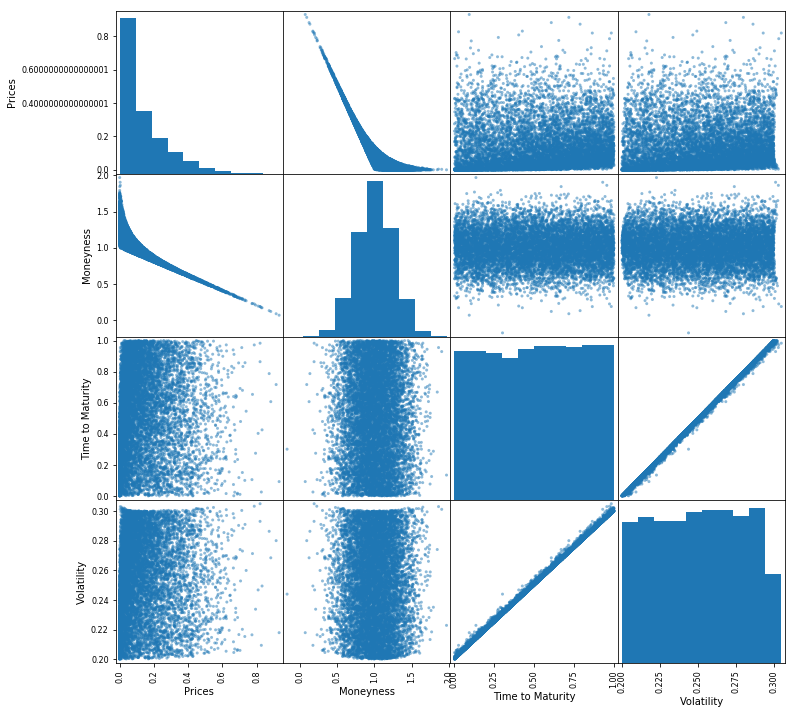

In [34]:
plt.figure(figsize=(15,15))
pd.plotting.scatter_matrix(df, figsize=(12,12))
plt.show()

## Option price exibit non linear relationship with most of the variables meaning that non linear models will do better job.

## Moneyness vs volatility shows more we deviate from moneyness, higher the volatility we face which illustrates volatiity skew/smile. 

## Univariate feature selection tries to find which is the most important variable, including many variables may overfit the data UFS is removing unnecessary or unimportant features generally select data based on training data

## Some are : Variance threshold (based on some variance, remove columns that does not meet the variance criterion

## Univariate feature selection: best features based on statistical tests, based on ANOVA, compare each feature with the targated variable to find out if there is statistacally important realtionship between them. It is called univariate because during this we ignore the other variables. Finally we compare all scores and choose the one that are highest. can use chi square ot f test.

## Recusrsive feature elimination : recursivly considering smaller and smaller sets of features, first all features and slowly slowly we will prune unnecessary features.

In [41]:
# import packages for feature selction
from sklearn.feature_selection import SelectKBest, f_regression

In [64]:
"""Some values in Y were zero, I have zeroed it out"""
best_features = SelectKBest(k='all', score_func=f_regression)
fit = best_features.fit(X,Y)
df_scores = pd.DataFrame(fit.scores_)
df_scores.index = ['Moneyness', 'Time to Maturity', 'Volatility']

In [66]:
# models to compare
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor

In [68]:
models = {
    'LR': LinearRegression(),
    'DT': DecisionTreeRegressor(),  #Classifiation and Regression Tree
    'SVR': SVR(),
    'KNR': KNeighborsRegressor(),
    'RFR': RandomForestRegressor(),
    'GFR': GradientBoostingRegressor(),
    'ETR': ExtraTreesRegressor(),
    'ADR': AdaBoostRegressor(),
    'NN': MLPRegressor()
}